## 1 Eksik değerlerin ele alınması

In [1]:
# Survived sutunu, baz alacağımız ana sutundur. hayatta mı değil mi

In [2]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Veri setini okumak
df = pd.read_csv("Titanic-Dataset.csv",delimiter=",")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df = df.drop(columns="PassengerId")

In [5]:
#Toplam satır ve sütun sayısına bakmak
df.shape

(891, 11)

In [6]:
# eksik veri kolonları
df.columns[df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [7]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df,5)

          Eksik Değerler  Eksik Değerler Yüzdesi
Cabin                687               77.104377
Age                  177               19.865320
Embarked               2                0.224467
Survived               0                0.000000
Pclass                 0                0.000000


In [8]:
# Cabin kolonu çok fazla eksik veri içerdiği için silmeye karar verdim.
df = df.drop(columns="Cabin")

<Axes: >

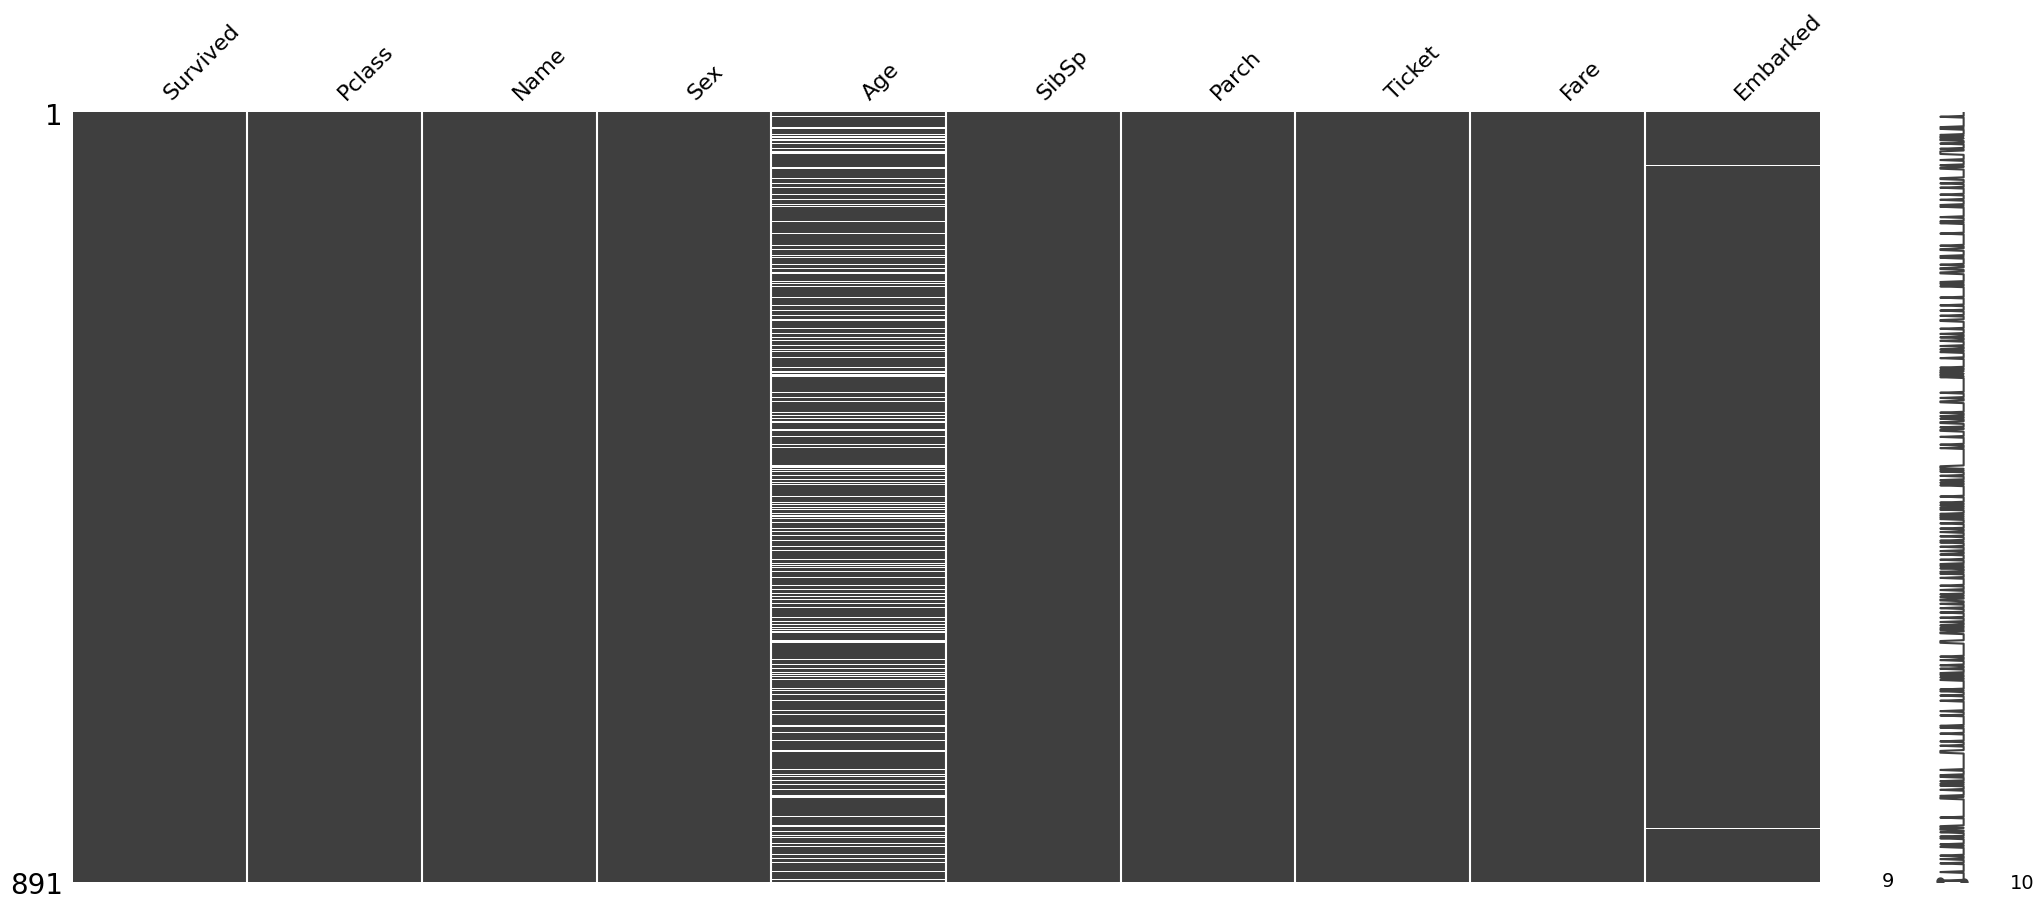

In [9]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df)

In [10]:
# Toplam kaç tane eksik değer var
df.isnull().sum().sum()

179

In [11]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df):

    # ortalama ile doldur
    df['Age'] = df['Age'].fillna(df['Age'].mean())

    # mod ile doldur
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    return df
df = eksik_verileri_doldur(df)

df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [12]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


## 2 Aykırı değerlerin tespiti 

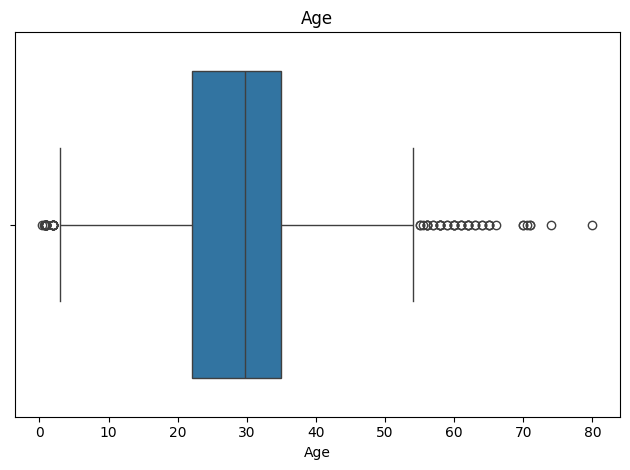

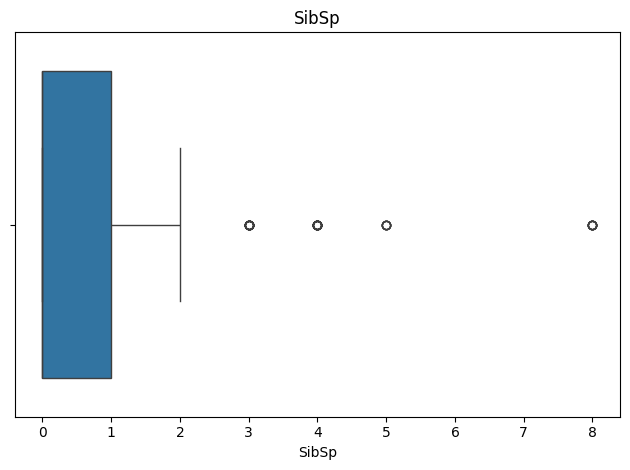

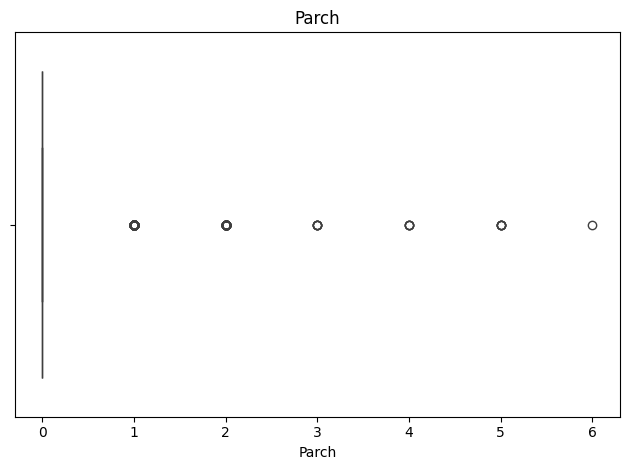

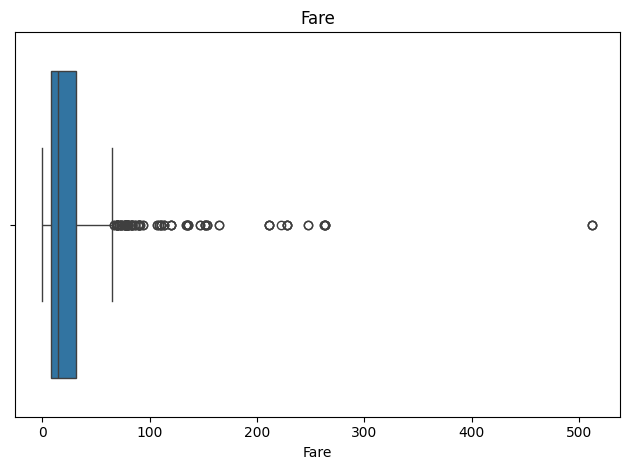

In [13]:
# Boxplot grafiği çizip aykırı değerleri değerlendirmek

# Numeric sütunları seçin
numeric_columns = df.select_dtypes(include=['float64', 'int']).columns

# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()


In [14]:
# Numerik sutunların tümünde bulunan Aykırı değerleri min-max ile baskılamak

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df):
    numerik_sutunlar = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numerik_sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir

        print(f"{col}: Alt Sınır: {alt_sinir}, Üst Sınır: {ust_sinir}\n")
        
    return df

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df)

df.head(3)

Survived: Alt Sınır: -1.5, Üst Sınır: 2.5

Pclass: Alt Sınır: 0.5, Üst Sınır: 4.5

Age: Alt Sınır: 2.5, Üst Sınır: 54.5

SibSp: Alt Sınır: -1.5, Üst Sınır: 2.5

Parch: Alt Sınır: 0.0, Üst Sınır: 0.0

Fare: Alt Sınır: -26.724, Üst Sınır: 65.6344



C:\Users\user\AppData\Local\Temp\ipykernel_20520\1014235969.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < alt_sinir, col] = alt_sinir
C:\Users\user\AppData\Local\Temp\ipykernel_20520\1014235969.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < alt_sinir, col] = alt_sinir
C:\Users\user\AppData\Local\Temp\ipykernel_20520\1014235969.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < alt_sinir, col] = alt_sinir


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S


## 3 Kategorik verilerin dönüşümü

In [15]:
"""
PassengerId => Yolcu numarası 
Survived => Yolcu hayatta mı 
Pclass => Yolcu sınıfları 
Name => Yolcunun adı 
Sex => Yolcunun cinsiyeti 
Age => Yolcunun yaşı 
SibSp => Yolcunun gemide bulunan kardeşleri yada eşleri
Parch => Yolcunun gemide bulunan anne, babası yada çocukları
Ticket => Yolcunun bilet numarası
Fare => Yolcunun bilet fiyatı 
Cabin => Yolcunun kabin numarası
Embarked => Yolcunun gemiye bindiği liman

"""

'\nPassengerId => Yolcu numarası \nSurvived => Yolcu hayatta mı \nPclass => Yolcu sınıfları \nName => Yolcunun adı \nSex => Yolcunun cinsiyeti \nAge => Yolcunun yaşı \nSibSp => Yolcunun gemide bulunan kardeşleri yada eşleri\nParch => Yolcunun gemide bulunan anne, babası yada çocukları\nTicket => Yolcunun bilet numarası\nFare => Yolcunun bilet fiyatı \nCabin => Yolcunun kabin numarası\nEmbarked => Yolcunun gemiye bindiği liman\n\n'

In [16]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df)

# Sonuçları görüntüleme
print(result)


float64 Veri Türü Sütunları:
Survived, Pclass, Age, SibSp, Fare

object Veri Türü Sütunları:
Name, Sex, Ticket, Embarked

int64 Veri Türü Sütunları:
Parch



In [17]:
df.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [17]:
# Name kolonu isimleri içeriyor. ayrıca bu isimlerin yanında ünvanları da var. bu ünvanlara göre bölüp yeni bi kolon oluşturacağım

df["Ünvan"] = df["Name"].str.split(".").str.get(0)
print(df["Ünvan"]) 
df["Ünvan"] = df["Ünvan"].str.split(",").str.get(1)
print(df["Ünvan"])
df["Ünvan"] = df["Ünvan"].str.strip() # baştaki ve sondaki boşlukları temizle

# İngilizce ve fransızca aynı olan ünvanları birleştirelim
f_ünvan = ["Don","Done","Mme","Ms","Mra","Mlle"]
i_ünvan = ["Mr","Mrs","Mrs","Mrs","Mrs","Miss"]

for i in range(len(f_ünvan)):
    for j in range(len(i_ünvan)):
        if i==j:
            df["Ünvan"] = df["Ünvan"].str.replace(f_ünvan[i],i_ünvan[j])

0           Braund, Mr
1         Cumings, Mrs
2      Heikkinen, Miss
3        Futrelle, Mrs
4            Allen, Mr
            ...       
886      Montvila, Rev
887       Graham, Miss
888     Johnston, Miss
889           Behr, Mr
890         Dooley, Mr
Name: Ünvan, Length: 891, dtype: object
0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Ünvan, Length: 891, dtype: object


In [18]:
# df DataFrame'inizde "Ünvan" sütunuyla gruplama ve sayma işlemi
grup_df = df.groupby("Ünvan").size().reset_index(name='Toplam')

# Toplam sayılara göre sıralama
sıralama_df = grup_df.sort_values(by='Toplam', ascending=False)
print(sıralama_df)

           Ünvan  Toplam
8             Mr     518
7           Miss     184
9            Mrs     127
6         Master      40
2             Dr       7
10           Rev       6
1            Col       2
5          Major       2
0           Capt       1
3       Jonkheer       1
4           Lady       1
11           Sir       1
12  the Countess       1


In [19]:
# Ünvan kolonunda frekansları fazla olanları alacağım az olanları ise diğerleri diye gruplayacağım.
df["Ünvan"] = df["Ünvan"].apply(lambda x:x if x in ["Mr","Miss","Mrs","Master"] else "other")
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ünvan
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S,Mr
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C,Mrs
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S,Miss


In [20]:
# df DataFrame'inizde "Ünvan" sütunuyla gruplama ve sayma işlemi
grup_df = df.groupby("Ünvan").size().reset_index(name='Toplam')

# Toplam sayılara göre sıralama
sıralama_df = grup_df.sort_values(by='Toplam', ascending=False)
print(sıralama_df)

    Ünvan  Toplam
2      Mr     518
1    Miss     184
3     Mrs     127
0  Master      40
4   other      22


In [21]:
# Ticket kolonunun içindeki değerlerin hayatta kalıp kalmama ile alakalı bir etkisinin bulunmayacağını düşünerek bu kolonu siliyorum. Ayrına Name kolonuna da ihtiyaç kalmadı
df = df.drop(columns=["Ticket","Name"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,0.0,3.0,male,22.0,1.0,0,7.2500,S,Mr
1,1.0,1.0,female,38.0,1.0,0,65.6344,C,Mrs
2,1.0,3.0,female,26.0,0.0,0,7.9250,S,Miss
3,1.0,1.0,female,35.0,1.0,0,53.1000,S,Mrs
4,0.0,3.0,male,35.0,0.0,0,8.0500,S,Mr


In [24]:
# Veri tiplerine bakmak
result = sütunlari_veri_türune_gore_grupla(df)

# Sonuçları görüntüleme
print(result)


float64 Veri Türü Sütunları:
Survived, Pclass, Age, SibSp, Fare

object Veri Türü Sütunları:
Sex, Embarked, Ünvan

int64 Veri Türü Sütunları:
Parch



In [26]:
# sex,Embarked,Ünvan ve ayrıca Pclass sutunları kategoriktir. bu sutunlara encoding uygulayacağım.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorik__değişkeler = ["Sex","Embarked","Ünvan" ,"Pclass"]
for i in kategorik__değişkeler:
    le.fit(df[i])
    df[i] = le.transform(df[i])
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,0.0,2,1,22.0,1.0,0,7.2500,2,2
1,1.0,0,0,38.0,1.0,0,65.6344,0,3
2,1.0,2,0,26.0,0.0,0,7.9250,2,1
3,1.0,0,0,35.0,1.0,0,53.1000,2,3
4,0.0,2,1,35.0,0.0,0,8.0500,2,2


# 4 Normalizasyon

In [27]:
#Age ve Fare kolonlarına  normalizasyon uyguladım

def normalize_columns(df, column):
    data = df[column]
    mini = min(data)
    maxi = max(data)
    
    yeni_data = []
    for value in data:
        yeni_data.append((value - mini)/(maxi - mini))
    
    df[column] = yeni_data

numerik_kolonlar = ['Age', 'Fare']
for col in numerik_kolonlar:
    normalize_columns(df, col)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,0.0,2,1,0.375000,1.0,0,0.110460,2,2
1,1.0,0,0,0.682692,1.0,0,1.000000,0,3
2,1.0,2,0,0.451923,0.0,0,0.120745,2,1
3,1.0,0,0,0.625000,1.0,0,0.809027,2,3
4,0.0,2,1,0.625000,0.0,0,0.122649,2,2


In [28]:
# İstediğimiz bir kolonun yerini değiştirip sona almak

yer_değiştir = df.pop('Survived')
df['Survived'] = yer_değiştir
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan,Survived
0,2,1,0.375000,1.0,0,0.110460,2,2,0.0
1,0,0,0.682692,1.0,0,1.000000,0,3,1.0
2,2,0,0.451923,0.0,0,0.120745,2,1,1.0
3,0,0,0.625000,1.0,0,0.809027,2,3,1.0
4,2,1,0.625000,0.0,0,0.122649,2,2,0.0


In [29]:
# Temizlenmiş veriyi CSV dosyasına kaydetmek

#df.to_csv('temizlenmis_titanic.csv', index=False)